In [1]:
#!pip install websocket-client

In [2]:
from fastai.vision.all import *
from callbacks.websocket_logger import WebsocketLogger

In [3]:
mnist_db = DataBlock(blocks=(ImageBlock, CategoryBlock), 
                  splitter= RandomSplitter(),
                  get_items=get_image_files,
                  get_y=parent_label)

In [4]:
dls = mnist_db.dataloaders(untar_data(URLs.MNIST), bs=128)

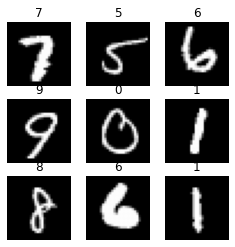

In [5]:
dls.show_batch(max_n=9, figsize=(4,4))

In [6]:
learn = cnn_learner(dls, resnet18, metrics=[accuracy, Recall(average='macro')])

epoch,train_loss,valid_loss,accuracy,recall_score,time
0,0.068154,0.062658,0.982357,0.982427,00:28
1,0.043835,0.039216,0.989214,0.989163,00:28
2,0.028018,0.034130,0.990429,0.990337,00:28


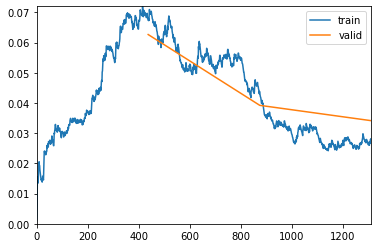

In [9]:
learn.unfreeze
learn.fit_one_cycle(3, lr_max = 5e-3, cbs=[ShowGraphCallback(), WebsocketLogger('ws://maichine:8555/ws/watchtrain/producer/99879')])

#### 